# Classification: Performance of the Naive Bayes algorithm on the given data set
Run theNaive Bayes tool on the resulting version of **`train_gr_smpl`**. To be able to do this in Weka, you may
need to apply several Weka “Filters”. Explain the reason for choosing and using these filters. Once
you can run the algorithm, record, compare and analyse the classifier’s accuracy on different classes
(as given by the confusion matrix).

### Proportional k-interval discretization
 According to the course textbook Equal Frequency binning is excellent for Naive bayes.
 
 **Specifically when the number of bins is equal to the sqaure root of the number of instances.** This is called Proportional k-interval discretization

* Preprocess (filter the data) data
    * normalize the data filter
    * Scipy / Keras maybe
    * Justify how / why 
* 

In [111]:
import helperfn

test = helperfn.get_random_data('y_train_smpl_0.csv')
test



(          0      1      2      3      4      5      6      7      8      9  \
 7298   43.0   48.0   53.0   48.0   46.0   45.0   46.0   47.0   46.0   45.0   
 3898   57.0   56.0   43.0   42.0   37.0   34.0   32.0   31.0   32.0   33.0   
 1144  156.0  182.0  217.0  227.0  236.0  246.0  250.0  253.0  254.0  243.0   
 5473   49.0   48.0   48.0   49.0   50.0   50.0   49.0   50.0   49.0   49.0   
 531    61.0   61.0   53.0   46.0   48.0   49.0   51.0   66.0   69.0   73.0   
 ...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 5884   39.0   36.0   34.0   34.0   34.0   34.0   35.0   37.0   40.0   37.0   
 7690   16.0   17.0   16.0   16.0   16.0   17.0   22.0   26.0   27.0   28.0   
 2781   20.0   23.0   22.0   28.0   60.0   95.0   63.0   45.0   47.0   49.0   
 5088   16.0   20.0   20.0   18.0   17.0   17.0   17.0   18.0   18.0   17.0   
 6428   72.0   69.0   66.0   68.0   69.0   72.0   78.0   83.0   86.0   81.0   
 
       ...   2294   2295   2296  2297  2298  2299 

In [112]:
test.dtypes
data = test.to_numpy()
data[0]

AttributeError: 'tuple' object has no attribute 'dtypes'

In [ ]:
import matplotlib.pyplot as plt

num_images = 5

for i in range(num_images):
    row = data[i]
    image = row.reshape(48,48)
    plt.subplot(1, num_images, i+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [99]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

x, y = helperfn.get_data(1)

model = MultinomialNB()
x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size = 0.5, random_state=0)





In [100]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Mean accuracy = ", clf.score(x_train, y_train))
print("Mean accuracy = ", clf.score(x_test, y_test))

Mean accuracy =  0.6906088751289989
Mean accuracy =  0.6778121775025799


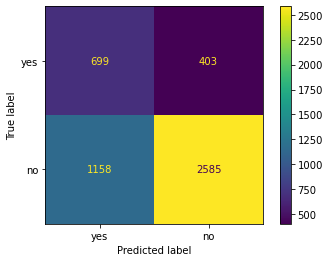

In [102]:
ConfMat = confusion_matrix(y_test, y_pred)
displayMatrix = ConfusionMatrixDisplay(ConfMat, display_labels=['yes', 'no']).plot()
